# 03. Phenotypic Phase Planes

In [1]:
#call load_model
%run 00load_model.ipynb

## Effects on cell growth

In [2]:
#Creation of datapoints for PPPs
growth_glc = production_envelope(model, ["EX_glc__D_e"])
growth_o2 = production_envelope(model, ["EX_o2_e"])

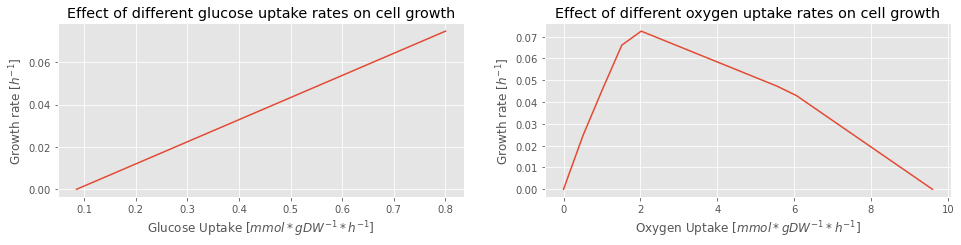

In [3]:
fig = plt.figure(figsize=plt.figaspect(0.2));

#Plot effect of glucose on growth
ax1 = fig.add_subplot(1, 2, 1);
ax1.plot(-1*growth_glc.EX_glc__D_e, growth_glc.flux_maximum);
ax1.set_xlabel(r"Glucose Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_ylabel(r"Growth rate $[h^{-1}]$");
ax1.set_title('Effect of different glucose uptake rates on cell growth');

#Plot effect of oxygen on growth
ax2 = fig.add_subplot(1, 2, 2);
ax2.plot(-1*growth_o2.EX_o2_e, growth_o2.flux_maximum);
ax2.set_xlabel(r"Oxygen Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_ylabel(r"Growth rate $[h^{-1}]$");
ax2.set_title('Effect of different oxygen uptake rates on cell growth');

## Effects on undecylprodigiosin production

In [4]:
#Creation of datapoints for PPPs with alternative objective function
with model:
    model.objective = model.reactions.DM_RED_c
    model.reactions.BIOMASS_SCO_tRNA.lower_bound = 0.045
    prod_glc = production_envelope(model, ["EX_glc__D_e"])
    prod_o2 = production_envelope(model, ["EX_o2_e"])

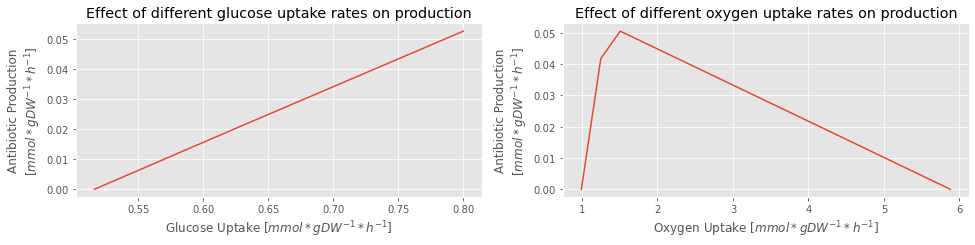

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.2));

#Plot effect of glucose on production
ax1 = fig.add_subplot(1, 2, 1);
ax1.plot(-1*prod_glc.EX_glc__D_e, prod_glc.flux_maximum);
ax1.set_xlabel("Glucose Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_ylabel("Antibiotic Production\n$[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_title('Effect of different glucose uptake rates on production');

#Plot effect of oxygen on production
ax2 = fig.add_subplot(1, 2, 2);
ax2.plot(-1*prod_o2.EX_o2_e, prod_o2.flux_maximum);
ax2.set_xlabel("Oxygen Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_ylabel("Antibiotic Production\n$[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_title('Effect of different oxygen uptake rates on production');

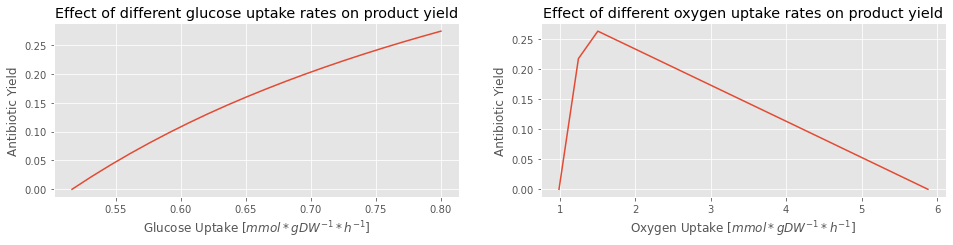

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.2));

#Plot effect of glucose on yield
ax1 = fig.add_subplot(1, 2, 1);
ax1.plot(-1*prod_glc.EX_glc__D_e, prod_glc.carbon_yield_maximum);
ax1.set_xlabel("Glucose Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_ylabel("Antibiotic Yield");
ax1.set_title('Effect of different glucose uptake rates on product yield');

#Plot effect of oxygen on yield
ax2 = fig.add_subplot(1, 2, 2);
ax2.plot(-1*prod_o2.EX_o2_e, prod_o2.carbon_yield_maximum);
ax2.set_xlabel("Oxygen Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_ylabel("Antibiotic Yield");
ax2.set_title('Effect of different oxygen uptake rates on product yield');

## Combined glucose and oxygen effect on production

In [7]:
#Creation of datapoints for 3D PPP with alternative objective function

#Maximising growth
growth_3d = production_envelope(model, ["EX_glc__D_e","EX_o2_e"], objective="BIOMASS_SCO_tRNA")
growth_3d = growth_3d.dropna(subset=['flux_maximum']).reset_index(drop=True) # to delete rows with initial conditions that made the simulation infeasible

#Maximising production
with model:
    model.objective = model.reactions.DM_RED_c
    model.reactions.BIOMASS_SCO_tRNA.lower_bound = 0.045
    prod_3d = production_envelope(model, ["EX_glc__D_e","EX_o2_e"], objective="DM_RED_c")
    prod_3d = prod_3d.dropna(subset=['flux_maximum']).reset_index(drop=True) # to delete rows with initial conditions that made the simulation infeasible

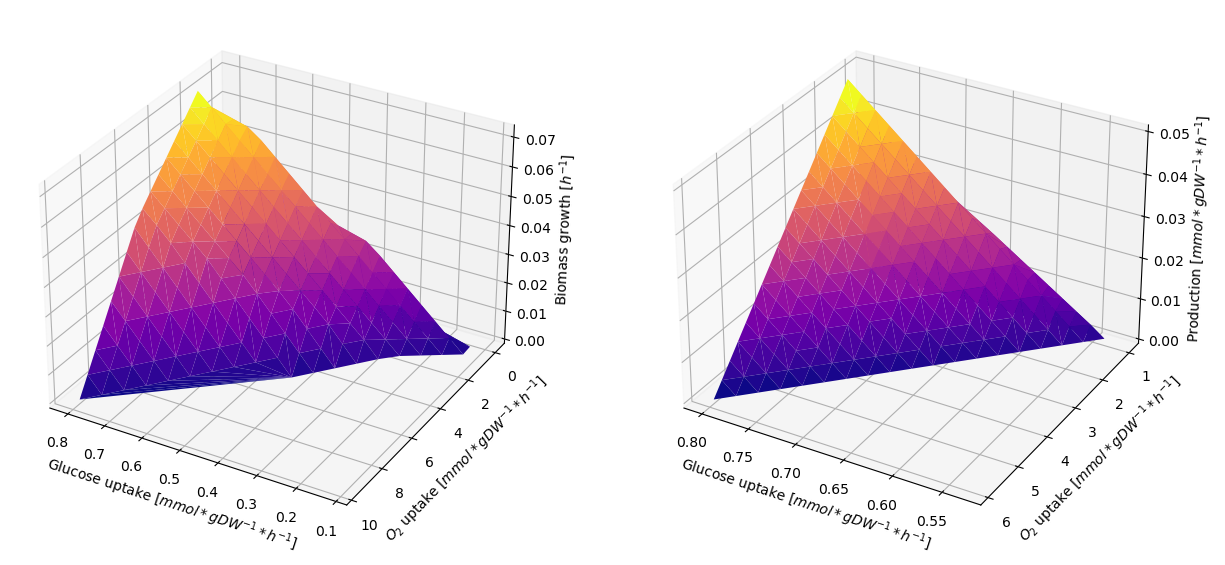

In [8]:
plt.style.use('default')
fig = plt.figure()
fig.set_size_inches(15, 10)

# Plot 3d graph of the effect of various glucose and oxygen uptake combinations on production
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(-1*growth_3d.EX_glc__D_e, -1*growth_3d.EX_o2_e, growth_3d.flux_maximum, cmap='plasma')

ax.set_xlabel('Glucose uptake $[mmol*gDW^{-1}*h^{-1}]$')
ax.set_ylabel('$O_2$ uptake $[mmol*gDW^{-1}*h^{-1}]$')
ax.set_zlabel('Biomass growth $[h^{-1}]$')
ax.view_init(30, 120)

# Plot 3d graph of the effect of various glucose and oxygen uptake combinations on yield
axs = fig.add_subplot(122, projection='3d')
axs.plot_trisurf(-1*prod_3d.EX_glc__D_e, -1*prod_3d.EX_o2_e, prod_3d.flux_maximum, cmap='plasma')

axs.set_xlabel('Glucose uptake $[mmol*gDW^{-1}*h^{-1}]$')
axs.set_ylabel('$O_2$ uptake $[mmol*gDW^{-1}*h^{-1}]$')
axs.set_zlabel('Production $[mmol*gDW^{-1}*h^{-1}]$')
axs.view_init(30, 120)